In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
# Step 2: Import YOLO from Ultralytics
from ultralytics import YOLO

# Step 3: Load Pretrained YOLOv5 Model
# You can choose between 'yolov5s', 'yolov5m', 'yolov5l', and 'yolov5x'.
# 's' is small, 'm' is medium, 'l' is large, 'x' is extra-large.
model = YOLO('yolov5s.pt')  # Loading the YOLOv5 small model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 325MB/s]


In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
def plot_results(image_path, results):
    # Load the image
    img = Image.open(image_path)
    plt.figure(figsize=(12, 8))
    plt.imshow(img)

    # Get the current axis
    ax = plt.gca()

    # Plot each bounding box
    for box in results[0].boxes:
        # Move tensor to CPU if it's on CUDA
        xyxy = box.xyxy[0].cpu() if box.xyxy[0].is_cuda else box.xyxy[0]
        x1, y1, x2, y2 = xyxy.numpy()
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add label
        cls = int(box.cls.cpu().numpy()[0] if box.cls.is_cuda else box.cls.numpy()[0])
        conf = float(box.conf.cpu().numpy()[0] if box.conf.is_cuda else box.conf.numpy()[0])
        label = f"{results[0].names[cls]} {conf:.2f}"
        plt.text(x1, y1, label, color='white', fontsize=10, backgroundcolor='red')

    plt.axis('off')  # Hide axes
    plt.tight_layout()
    plt.show()



image 1/1 /content/dog_backpack.png: 640x448 1 person, 2 dogs, 41.2ms
Speed: 13.6ms preprocess, 41.2ms inference, 333.8ms postprocess per image at shape (1, 3, 640, 448)


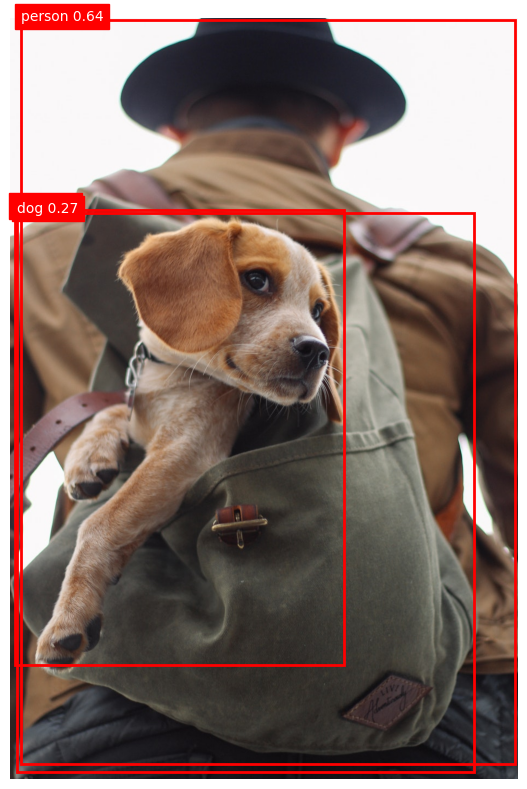

In [5]:
image_path = '/content/dog_backpack.png'
results = model(image_path)
plot_results(image_path, results)


image 1/1 /content/gorilla.jpg: 448x640 1 dog, 1 bear, 63.8ms
Speed: 4.3ms preprocess, 63.8ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


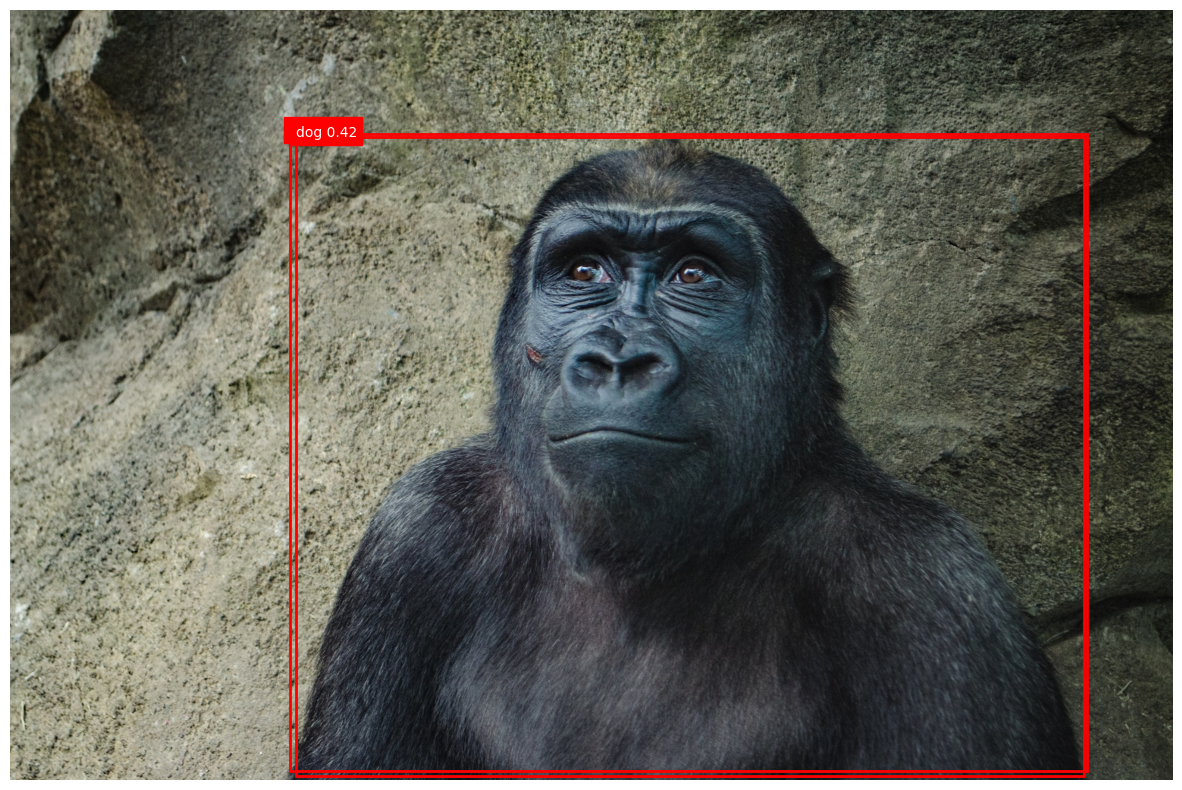

In [6]:
image_path = '/content/gorilla.jpg'
results = model(image_path)
plot_results(image_path, results)


image 1/1 /content/grayscale_image.jpg: 448x640 1 cat, 12.5ms
Speed: 3.2ms preprocess, 12.5ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


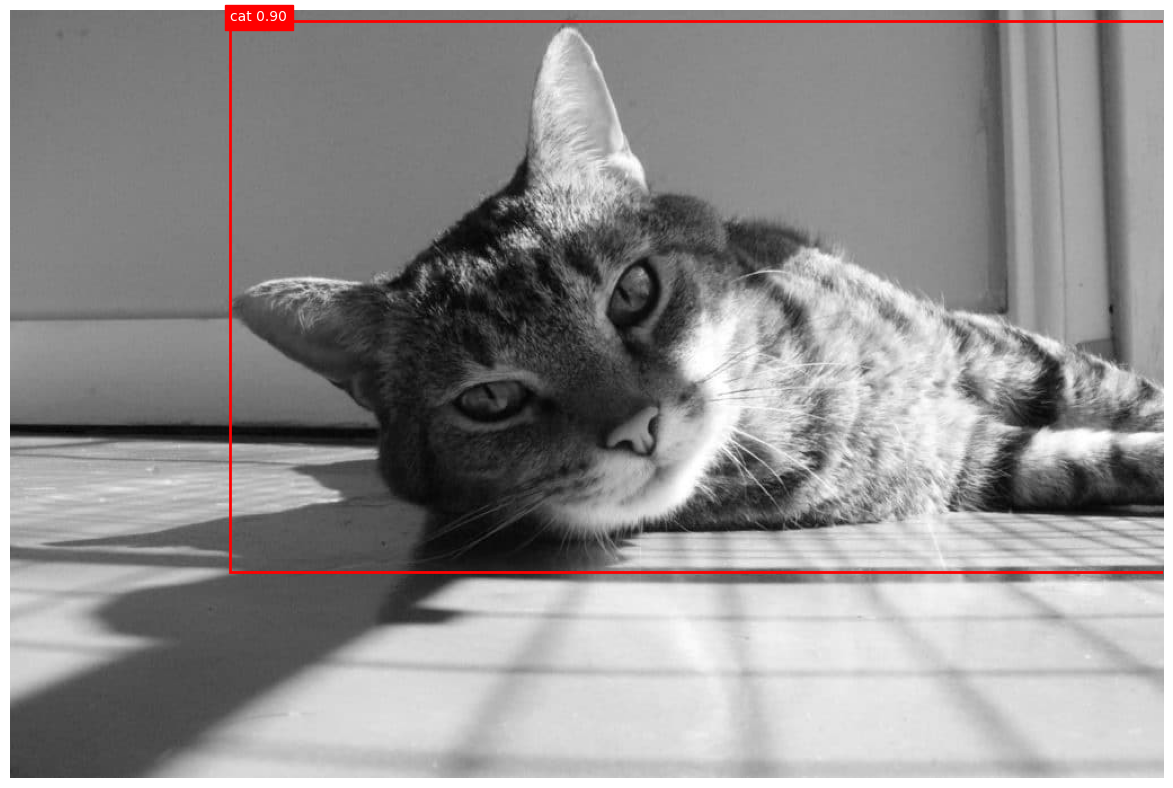

In [7]:
image_path = '/content/grayscale_image.jpg'
results = model(image_path)
plot_results(image_path, results)


image 1/1 /content/solvay_conference.jpg: 352x640 21 persons, 4 ties, 1 chair, 165.8ms
Speed: 19.6ms preprocess, 165.8ms inference, 8.7ms postprocess per image at shape (1, 3, 352, 640)


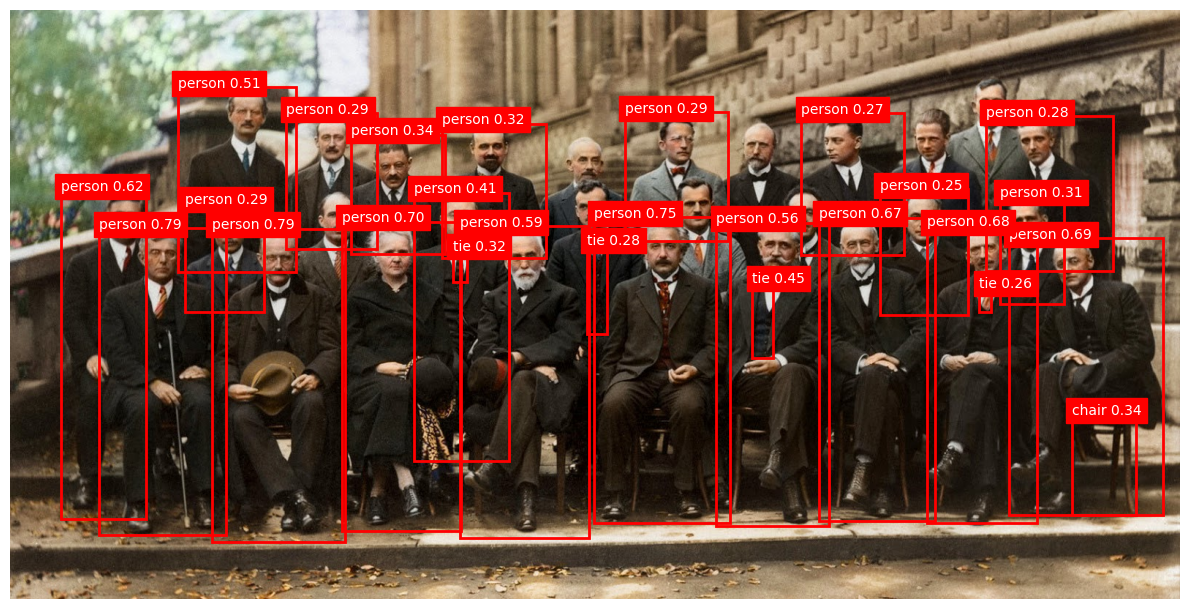

In [9]:
image_path = '/content/solvay_conference.jpg'
results = model(image_path)
plot_results(image_path, results)